In [1]:
# ============================================
# || import all necessary libraries         ||
# ============================================

import numpy as np
#import matplotlib.pyplot as plt
import random
import time
#from typing import Dict, List, Tuple, Any
#import sys
#import os

# Utilities
from utils.data import get_fixed_data
from utils.visualization import plot_results, plot_experiment_results, plot_cost_histogram, compare_policies

# Task 0
## Liv har code som er brugt til de to scenarier

Optimal cost: 229.84


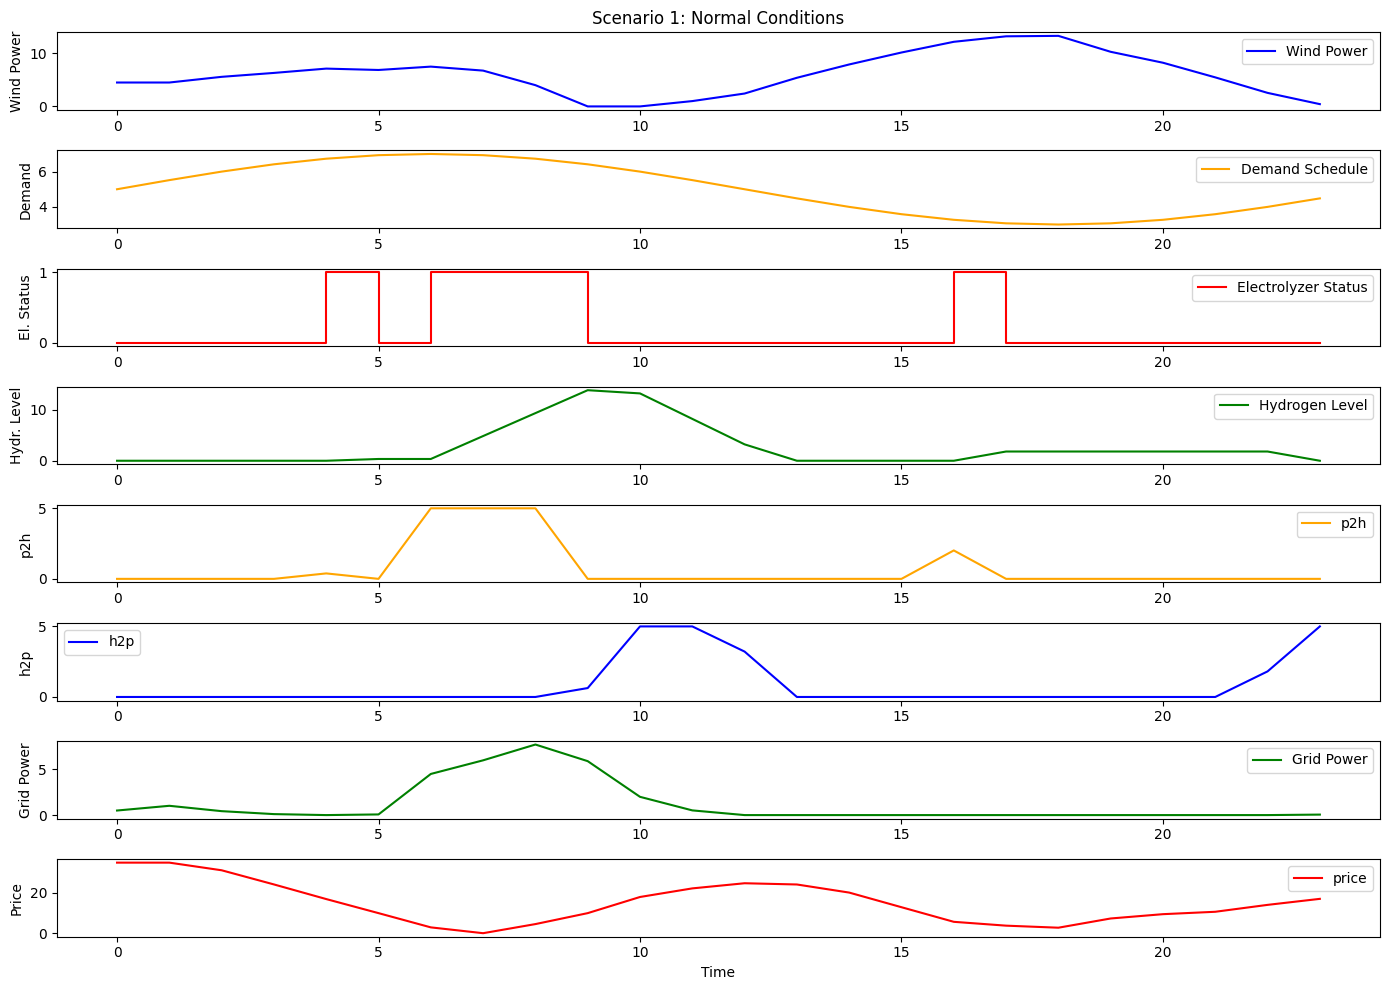

Optimal cost: 54.12


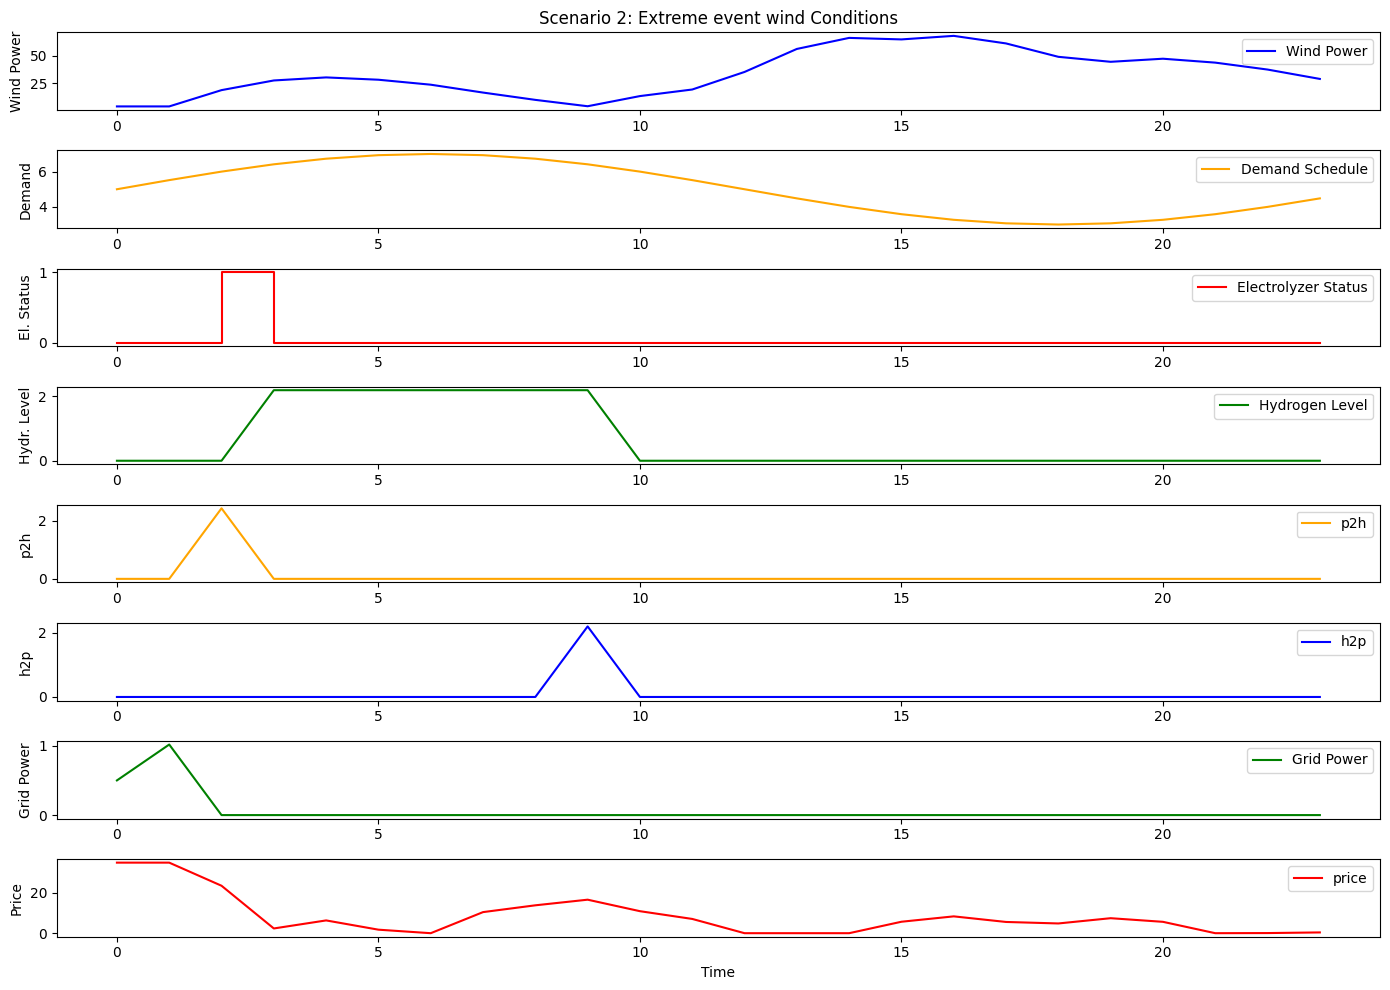

In [2]:
from task_0.helper_functions import generate_trajectories, solve_milp

def main() -> None:
    data = get_fixed_data()
    
    # First scenario - Normal conditions
    wind1, price1 = generate_trajectories(data)
    results1 = solve_milp(wind1, price1, data, False)
    plot_results(wind1, price1, results1, data, "Scenario 1: Normal Conditions")

    # Second scenario - More volatile conditions?
    data_volatile = data.copy()
    data_volatile['extreme_event_prob_wind'] = 0.8

    wind2, price2 = generate_trajectories(data_volatile)
    results2 = solve_milp(wind2, price2, data, False)
    plot_results(wind2, price2, results2, data, "Scenario 2: Extreme event wind Conditions")
random.seed(42)
main()

# Task 1

In [3]:
from task_1.evaluation_framework import create_experiments
data = get_fixed_data()
create_experiments(3, data)


([0, 1, 2],
 array([[ 4.5       ,  4.5       ,  4.83533061,  5.74199275,  5.85197065,
          6.56565669,  5.39140906,  4.20393922,  2.2738339 ,  0.45156407,
          1.82785306,  3.64076433,  3.37715631,  3.22557712,  4.15357132,
          4.64806776,  6.87422625,  8.61984122,  8.89727642,  8.18985237,
          6.2136505 ,  4.66251966,  3.61869548,  2.10956506],
        [ 4.5       ,  4.5       ,  4.35021681,  2.94706228,  1.44369117,
          0.        ,  0.22406345,  2.57047612,  3.79350088,  3.66068363,
          2.52469382,  2.28423124,  4.0781996 ,  4.51607651,  5.18671987,
          5.77188855,  4.51038386,  2.64287883,  1.7765518 ,  3.16399659,
          5.02327778,  3.9373758 ,  3.41843879,  4.23234673],
        [ 4.5       ,  4.5       ,  5.38614624,  6.99357674,  5.90717644,
          6.14491543,  8.46441562, 10.01934723, 10.14458476, 10.40028435,
          9.17075094,  8.20143986,  7.25099709,  8.19010352,  8.54472312,
         10.56740103, 10.18754121,  9.83237165, 10

ENERGY HUB MDP EVALUATION

Evaluating Dummy Policy over 20 experiments...
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 745.92
Min cost: 129.24, Max cost: 1750.62
Dummy Policy Results:
Average Cost: 745.92
Min Cost: 129.24
Max Cost: 1750.62
Evaluation Time: 0.00 seconds

Generating visualizations...

Generating visualizations for Dummy Policy...


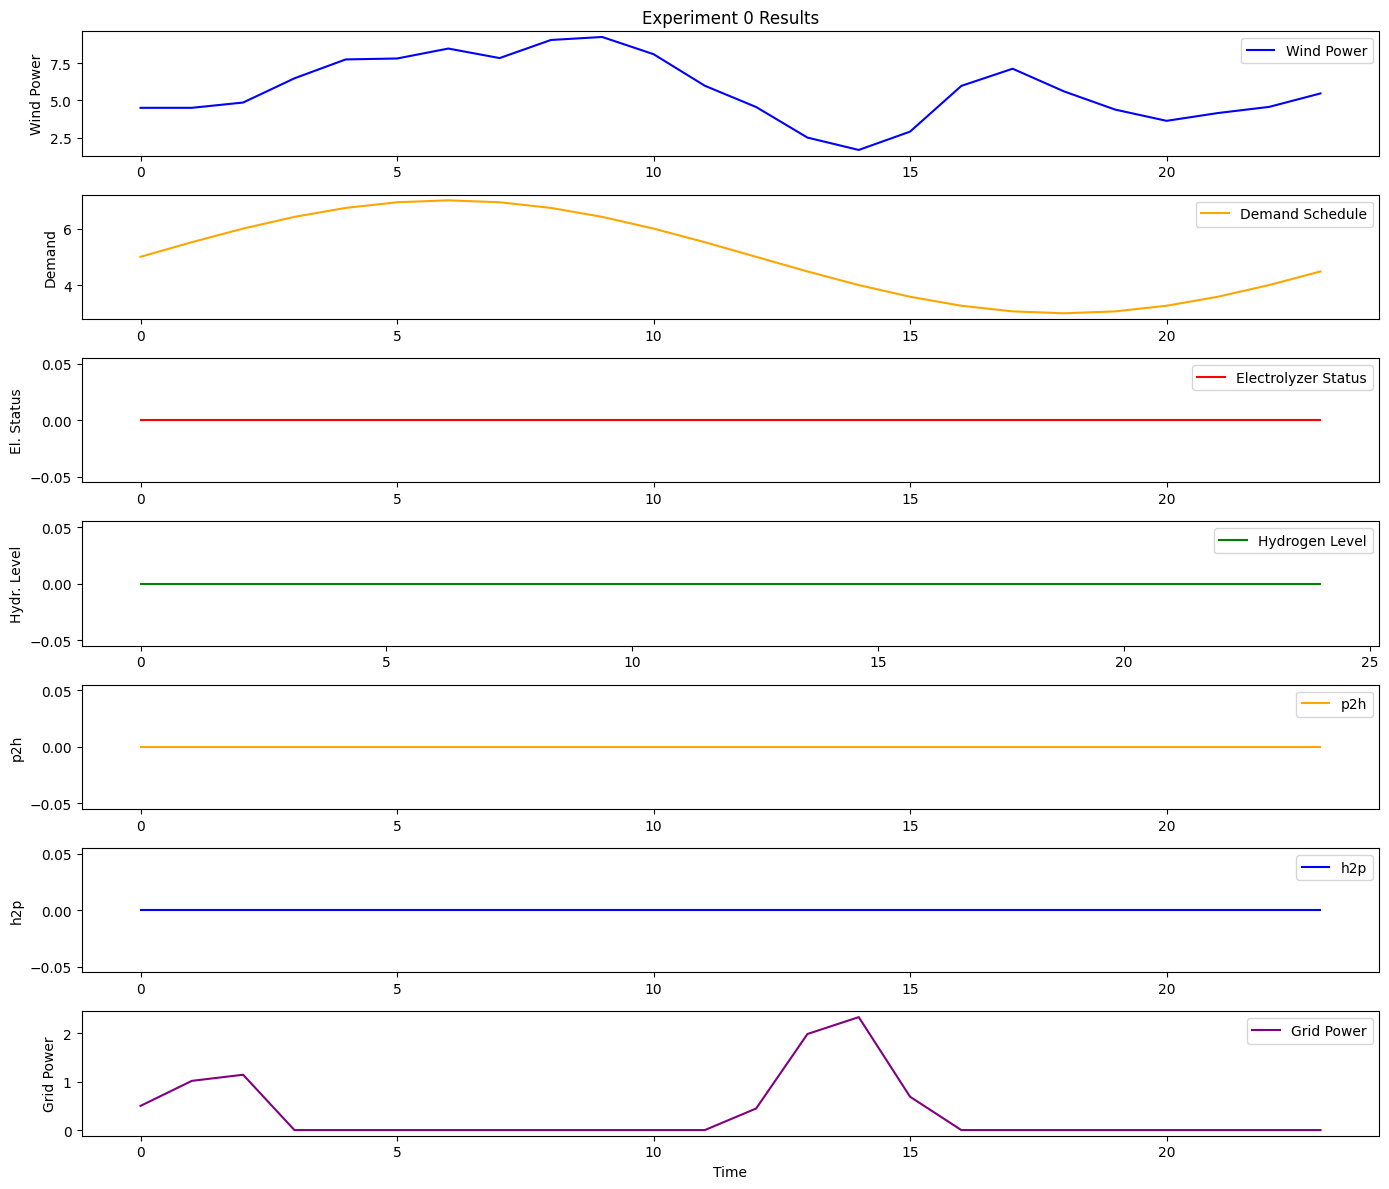

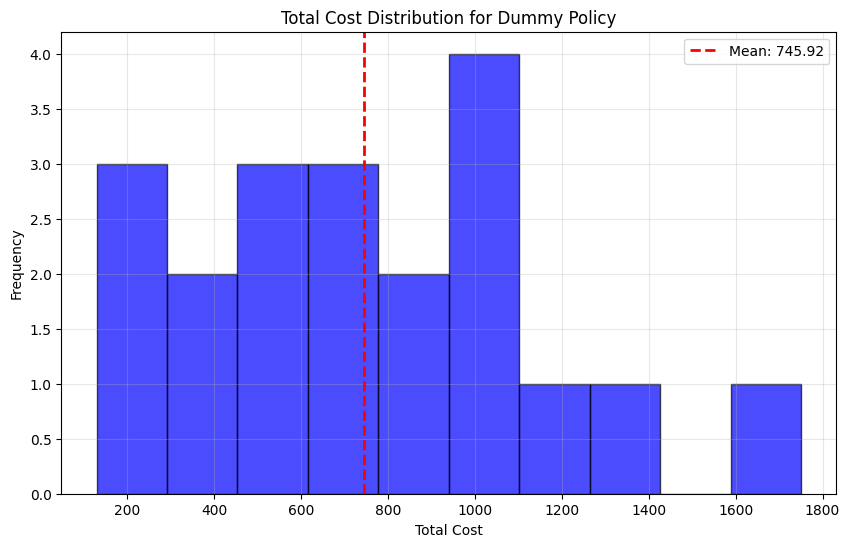

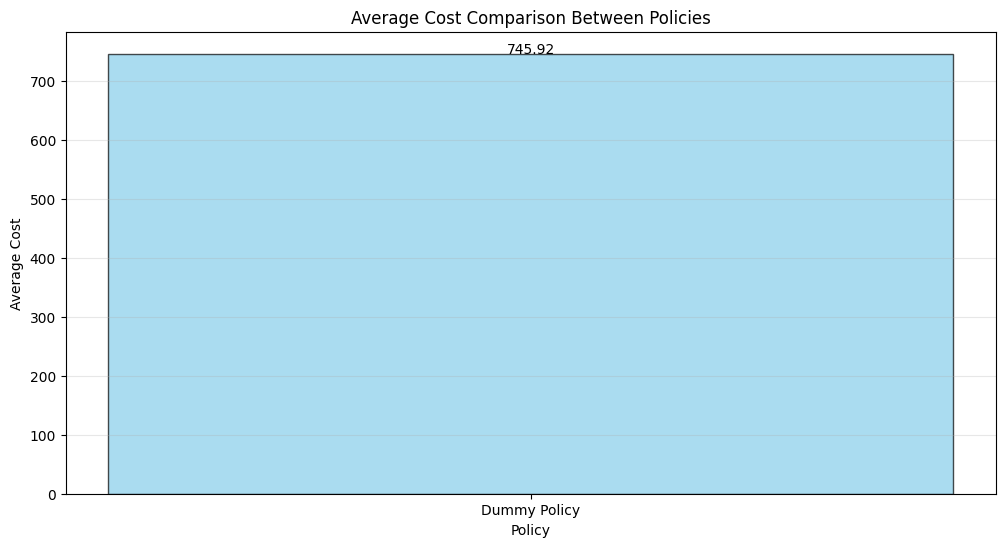


Evaluation completed successfully!


In [4]:
from task_1.evaluation_framework import evaluate_policy
from task_1.energy_hub_policies import dummy_policy
def main():
    data = get_fixed_data()
    
    print("=" * 50)
    print("ENERGY HUB MDP EVALUATION")
    print("=" * 50)
    num_experiments = 20
    policy_results = {}
    policies = {
        "Dummy Policy": dummy_policy
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    # Evaluate each policy
    for policy_name, policy_func in policies.items():
        print(f"\nEvaluating {policy_name} over {num_experiments} experiments...")
        start_time = time.time()
        
        avg_cost, results = evaluate_policy(policy_func,data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
        #avg_cost, results = evaluate_policy(policy_func, num_experiments=num_experiments)
        
        elapsed_time = time.time() - start_time
        
        print(f"{policy_name} Results:")
        print(f"Average Cost: {avg_cost:.2f}")
        print(f"Min Cost: {np.min(results['total_costs']):.2f}")
        print(f"Max Cost: {np.max(results['total_costs']):.2f}")
        print(f"Evaluation Time: {elapsed_time:.2f} seconds")
        
        # Store the results
        policy_results[policy_name] = results
    
    print("\nGenerating visualizations...")
    
    for policy_name, results in policy_results.items():
        print(f"\nGenerating visualizations for {policy_name}...")
        
        plot_experiment_results(results, experiment_index=0, data=data) # just the first experiment
        
        plot_cost_histogram(results, policy_name=policy_name) # histogram of total costs over all experiments
    
    # Compare all policies for next task
    compare_policies(policy_results)
    
    print("\nEvaluation completed successfully!")
    
    return policy_results

if __name__ == "__main__":
    policy_results = main()

# Task 2

TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT

--------------------------------------------------
Evaluating: Dummy Policy
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Processing experiment 20...
Processing experiment 25...
Processing experiment 30...
Processing experiment 35...
Processing experiment 40...
Processing experiment 45...
Processing experiment 50...
Processing experiment 55...
Processing experiment 60...
Processing experiment 65...
Processing experiment 70...
Processing experiment 75...
Processing experiment 80...
Processing experiment 85...
Processing experiment 90...
Processing experiment 95...
Average policy cost: 647.83
Min cost: 63.04, Max cost: 1724.38

Results for Dummy Policy:
Average Cost: 647.83
Min Cost: 63.04
Max Cost: 1724.38
Standard Deviation: 349.78
Evaluation Time: 0.01 seconds

---------------------------------------------

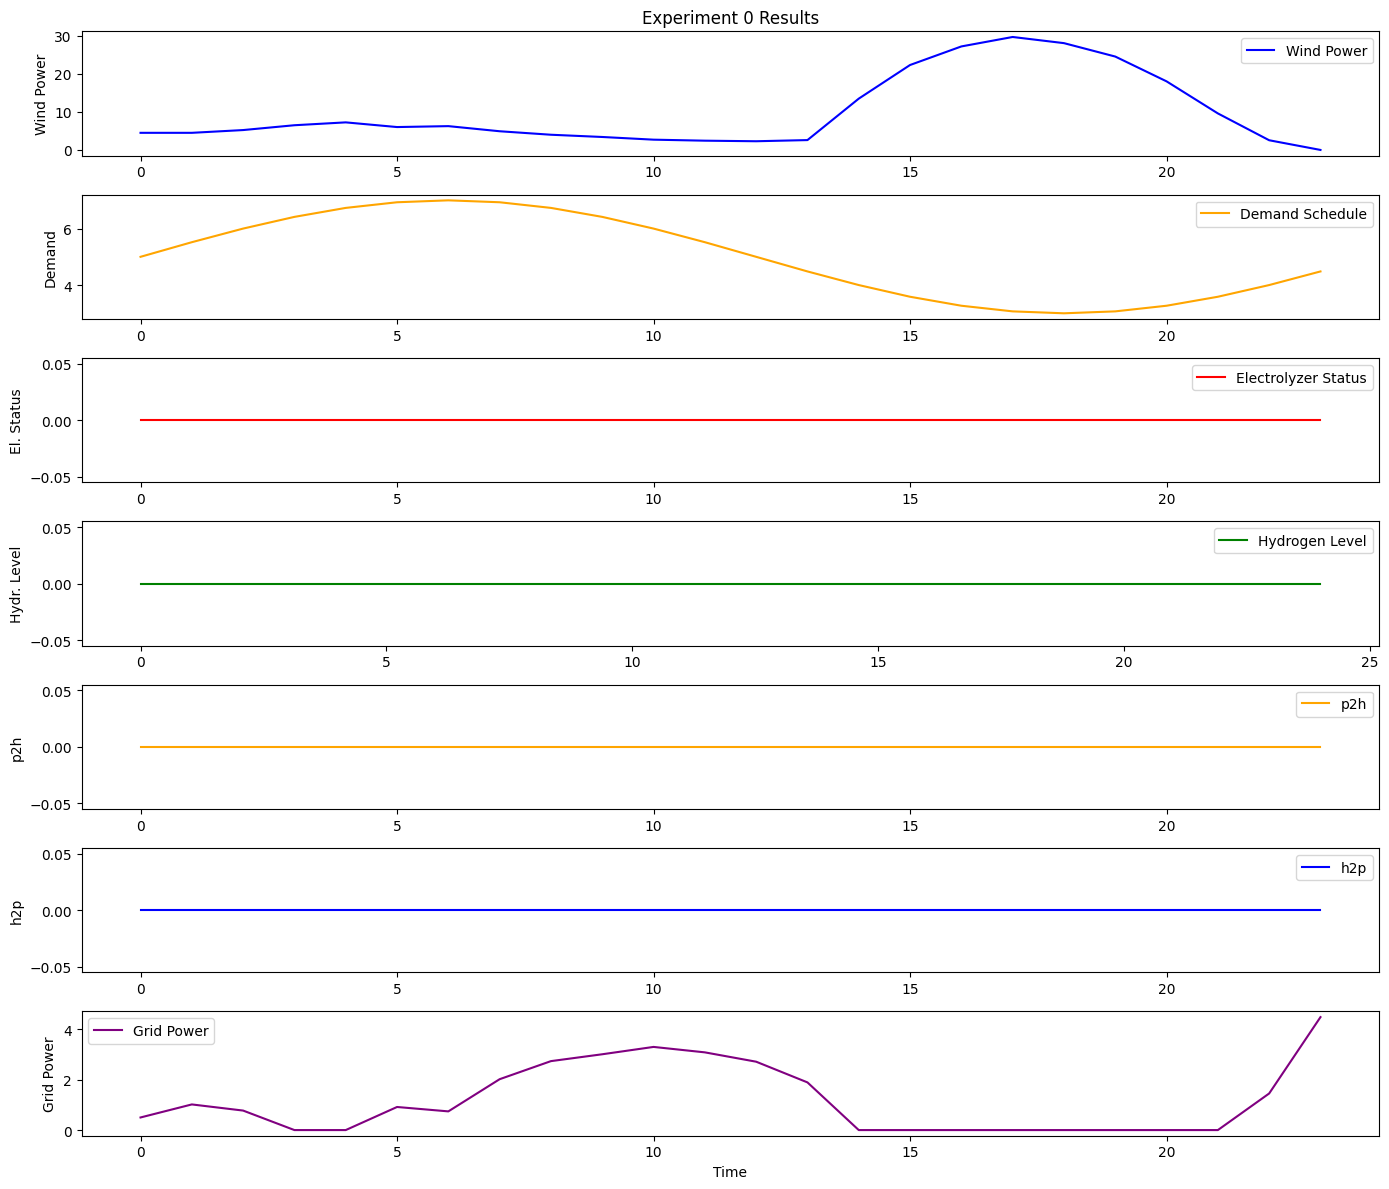

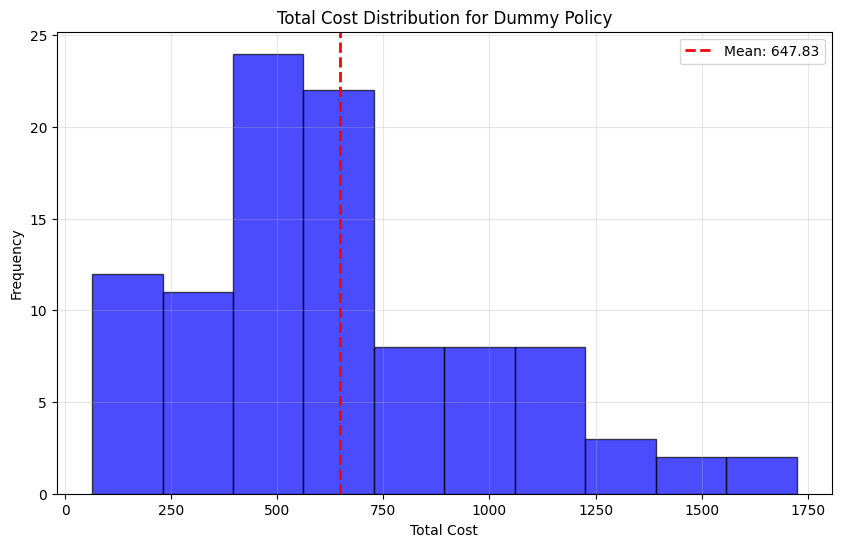


Visualizing results for Expected Value Policy (H=5)...


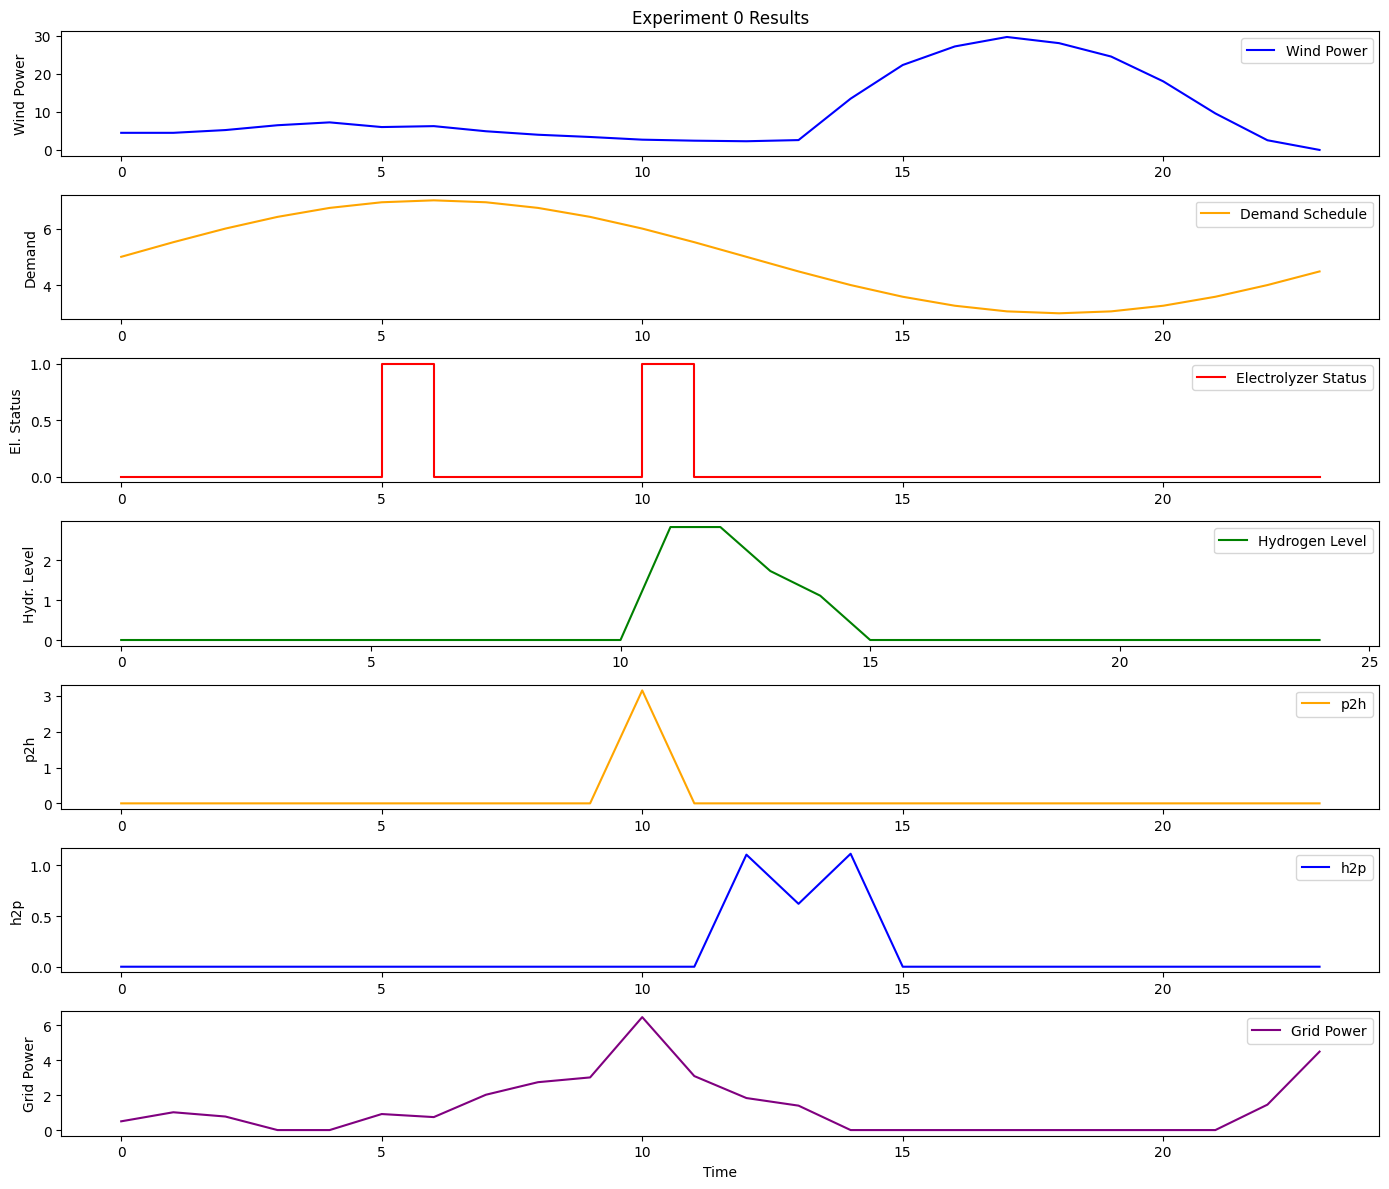

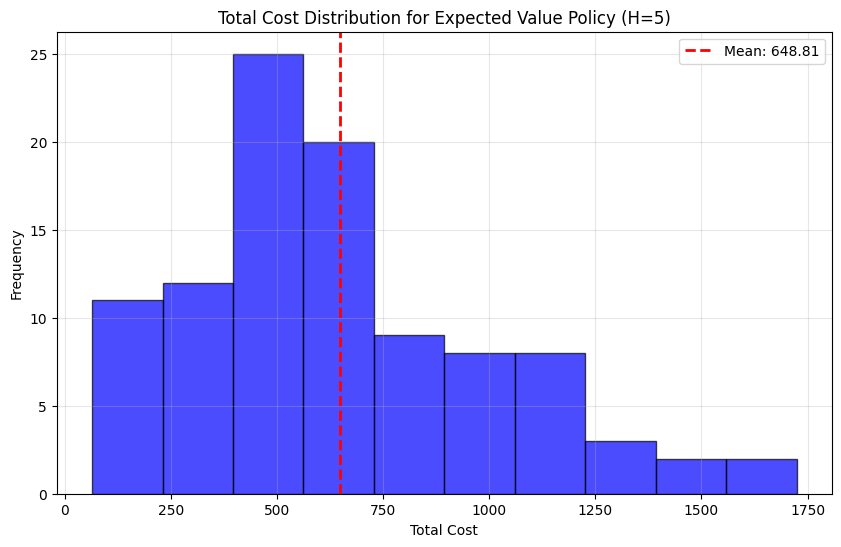


Visualizing results for SP Policy (H=1, S=5)...


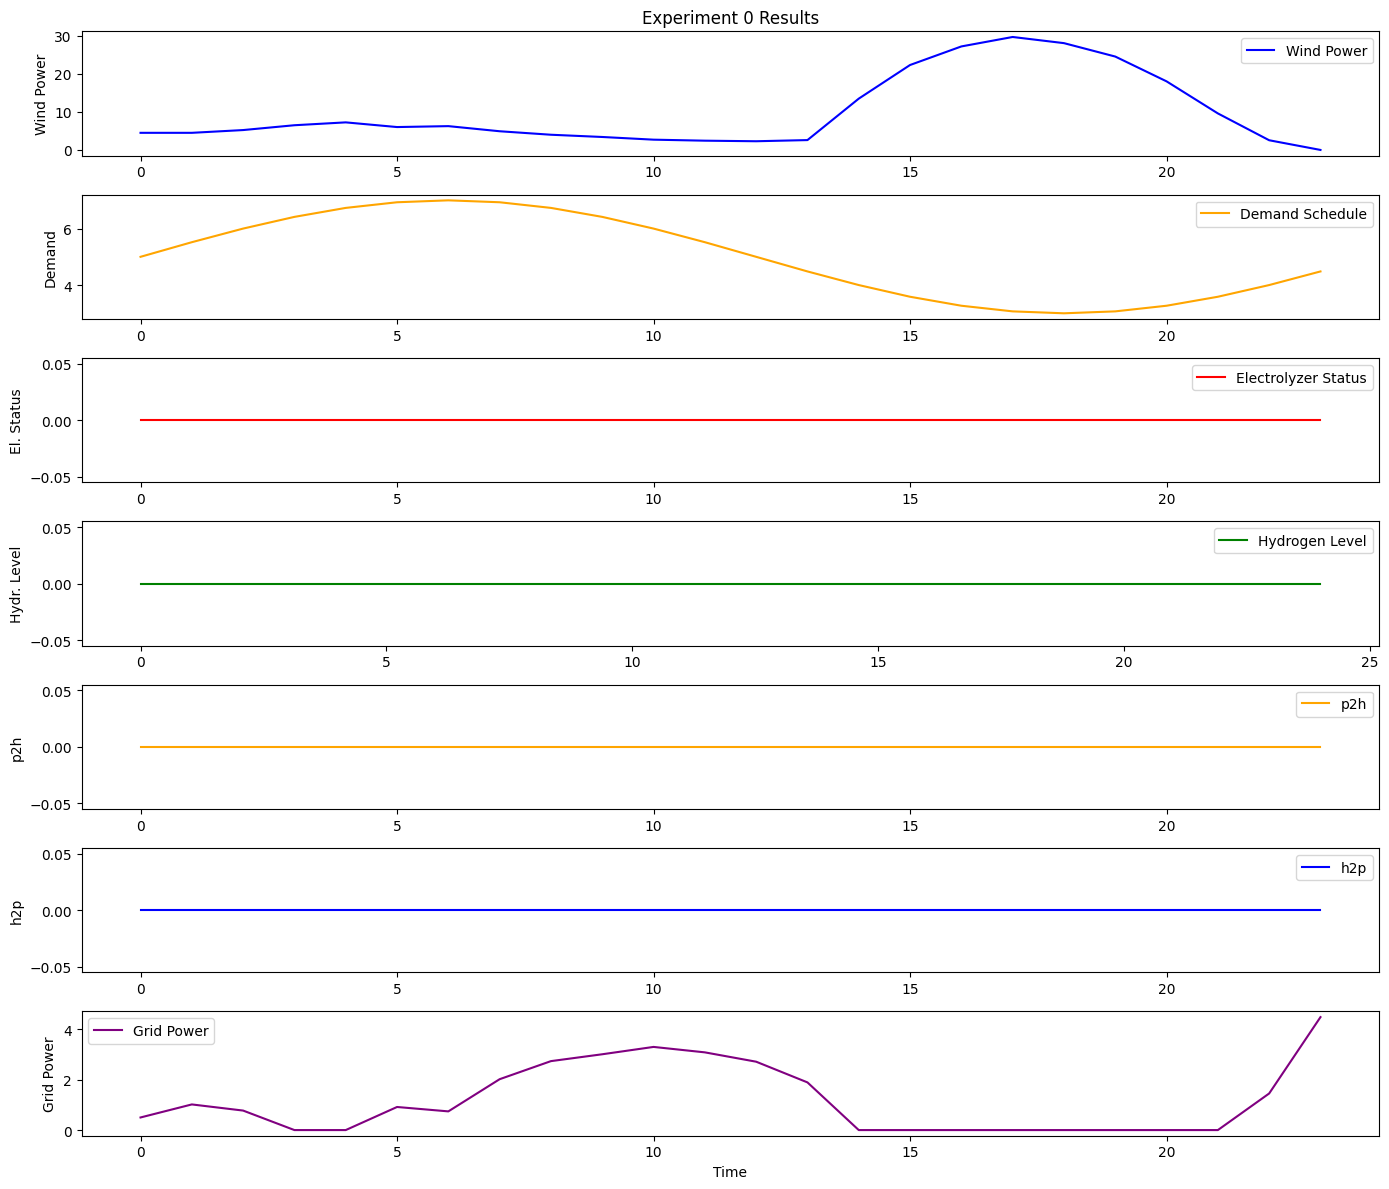

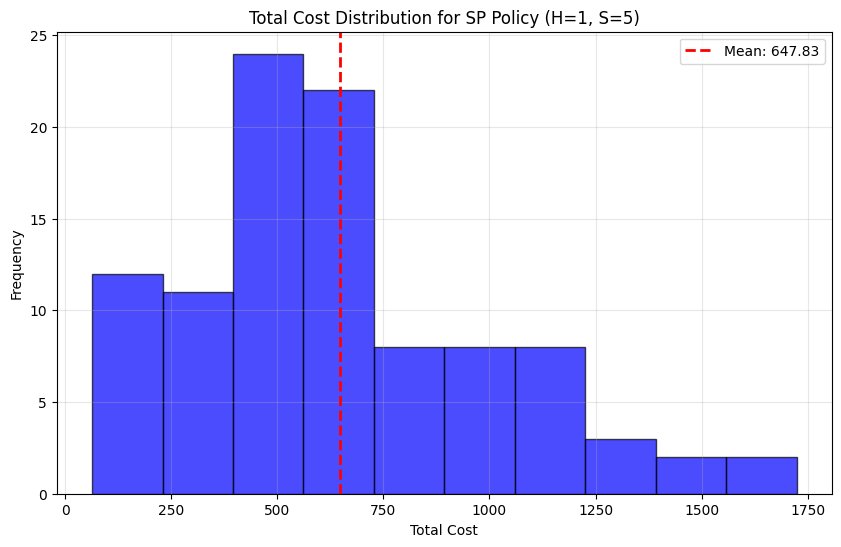


Visualizing results for SP Policy (H=5, S=5)...


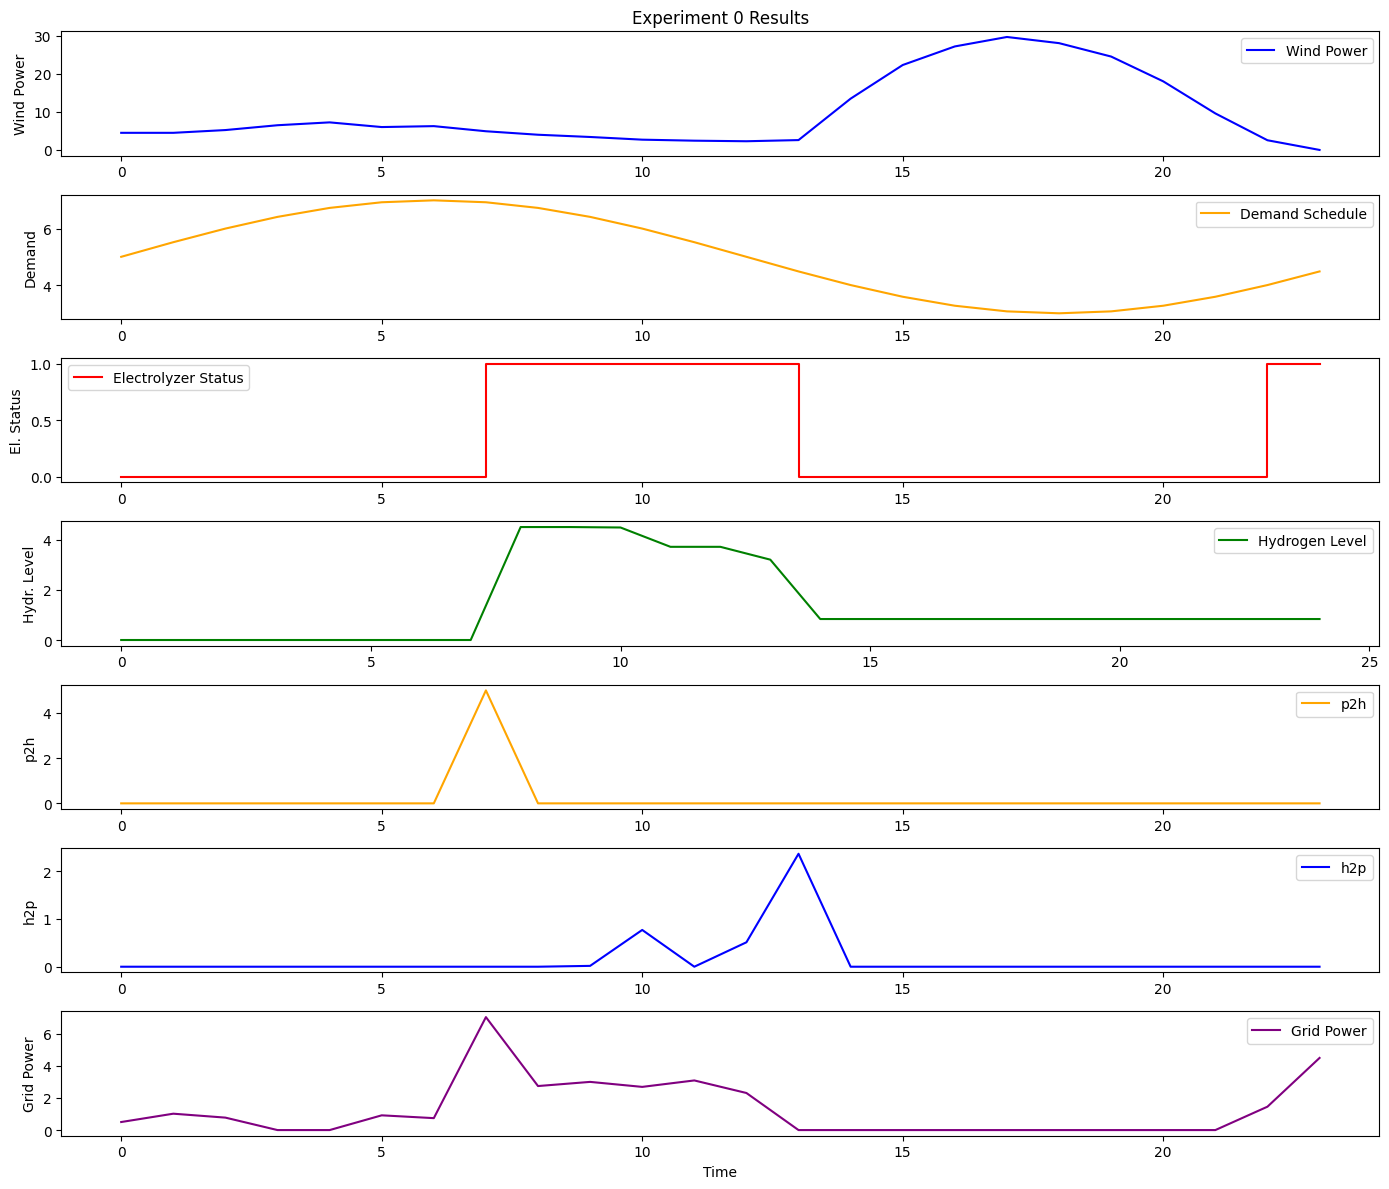

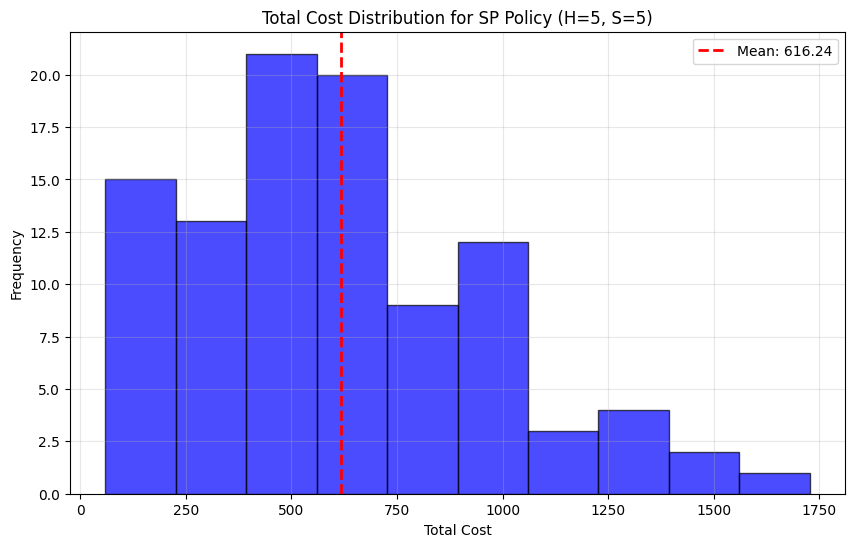


Visualizing results for SP Policy (H=10, S=5)...


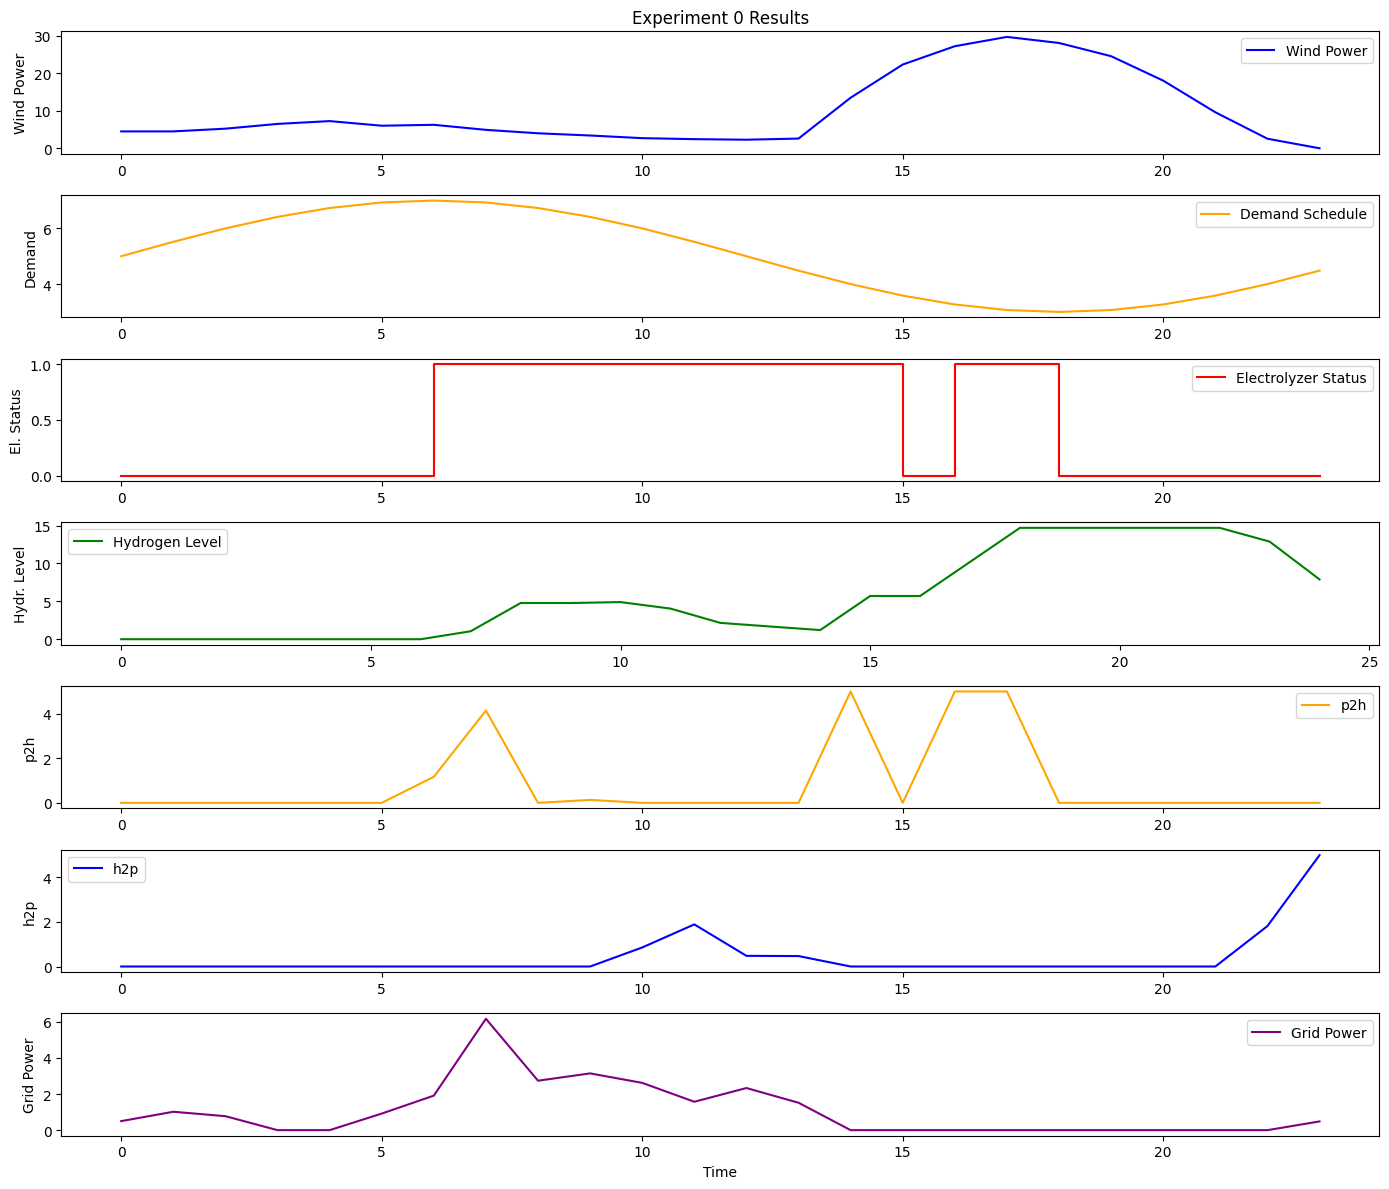

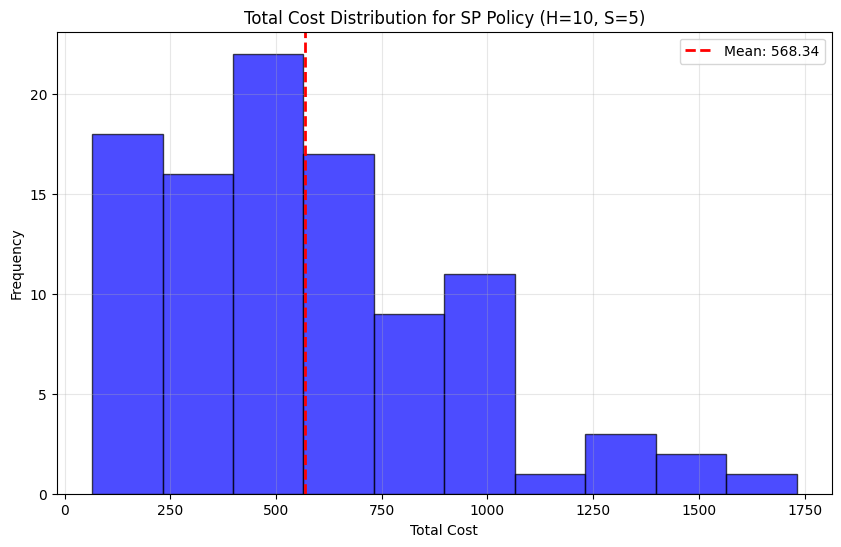


Generating comparison across all policies...


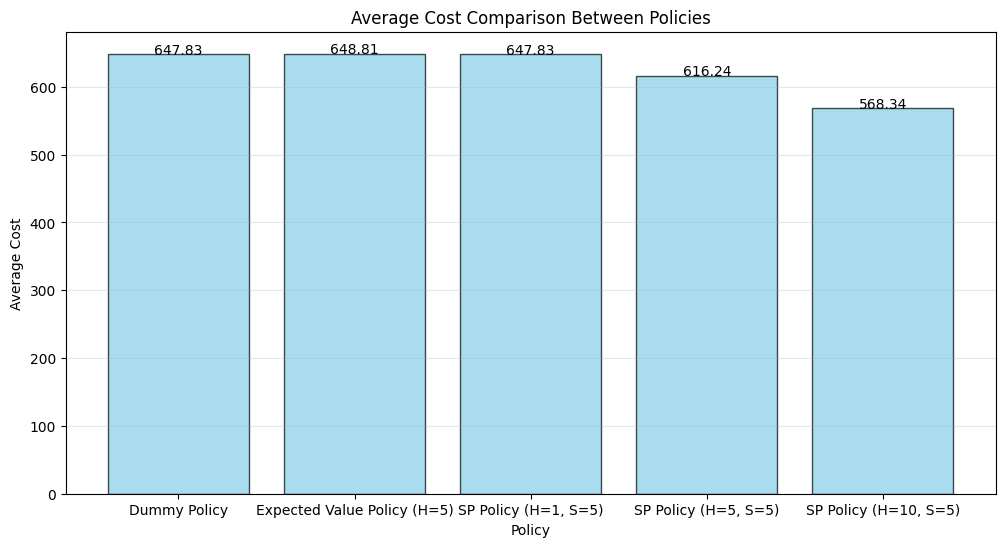


Task 2 evaluation completed successfully!


In [6]:
from task_2.helper_functions import (
    sp_policy_short_horizon,
    sp_policy_medium,
    sp_policy_long_horizon,
    ev_policy
)

def main():
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    # Is this enough?
    num_experiments = 100
    
    policy_results = {} # store results
    
    policies = {
        "Dummy Policy": dummy_policy,
        "Expected Value Policy (H=5)": ev_policy,
        "SP Policy (H=1, S=5)": sp_policy_short_horizon,
        "SP Policy (H=5, S=5)": sp_policy_medium,
        "SP Policy (H=10, S=5)": sp_policy_long_horizon,
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    for policy_name, policy_func in policies.items():
        print(f"\n{'-' * 50}")
        print(f"Evaluating: {policy_name}")
        print(f"{'-' * 50}")
        
        start_time = time.time()
        
        try:
            avg_cost, results = evaluate_policy(policy_func,data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
            
            elapsed_time = time.time() - start_time
            
            print(f"\nResults for {policy_name}:")
            print(f"Average Cost: {avg_cost:.2f}")
            print(f"Min Cost: {np.min(results['total_costs']):.2f}")
            print(f"Max Cost: {np.max(results['total_costs']):.2f}")
            print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
            print(f"Evaluation Time: {elapsed_time:.2f} seconds")
            policy_results[policy_name] = results
            
        except Exception as e:
            print(f"Error evaluating {policy_name}: {e}")
    
    # Generate visualizations if results are available
    # Here claude.ai is used to write the visualizations
    if policy_results:
        print("\nGenerating visualizations...")
        
        # Generate individual policy visualizations
        for policy_name, results in policy_results.items():
            print(f"\nVisualizing results for {policy_name}...")
            
            # Plot results for a single experiment
            plot_experiment_results(results, experiment_index=0, data=data)
            
            # Plot histogram of costs across all experiments
            plot_cost_histogram(results, policy_name=policy_name)
        
        # Compare all policies if we have more than one
        if len(policy_results) > 1:
            print("\nGenerating comparison across all policies...")
            compare_policies(policy_results)
        
        print("\nTask 2 evaluation completed successfully!")
        
        # Return the results dictionary for further analysis if needed
        return policy_results
    else:
        print("\nNo policy evaluation results available.")
        return None

if __name__ == "__main__":
    main()